In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [66]:
df = pd.read_csv('loan_approval_data.csv')
print(
df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [67]:
catagorical_cols = df.select_dtypes(include=["object"]).columns
numerical_cols = df.select_dtypes(include=["number"]).columns


In [68]:
from sklearn.impute import SimpleImputer
num_imp = SimpleImputer(strategy="mean")

df[numerical_cols]=num_imp.fit_transform(df[numerical_cols])

In [69]:
cat_imp = SimpleImputer(strategy="most_frequent")
df[catagorical_cols] = cat_imp.fit_transform(df[catagorical_cols])

In [70]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


Text(0.5, 1.0, 'Loan Status Distribution')

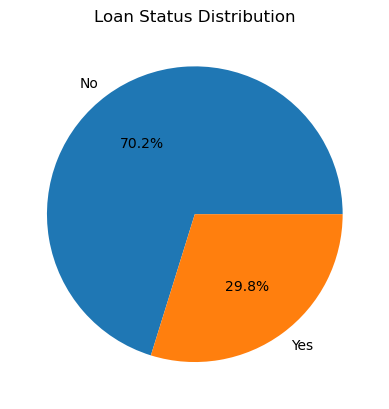

In [71]:
# eda 
classes_count = df['Loan_Approved'].value_counts()
plt.pie(classes_count, labels=classes_count.index, autopct='%1.1f%%')
plt.title('Loan Status Distribution')

[Text(0, 0, '621'), Text(0, 0, '379')]

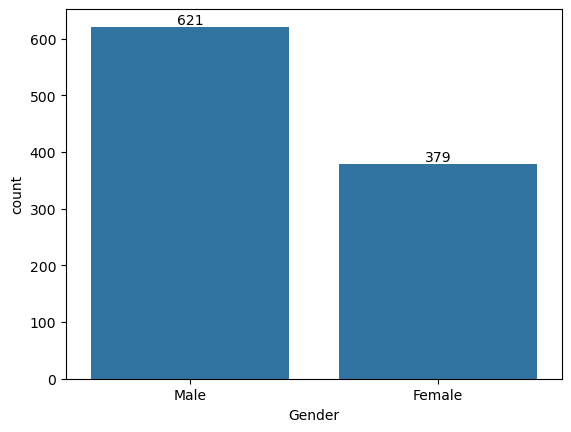

In [72]:
gender_count = df['Gender'].value_counts()
ax = sns.barplot(gender_count )
ax.bar_label( ax.containers[0])


In [73]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


In [74]:
print("Unique values before mapping:", df['Gender'].unique())

Unique values before mapping: ['Female' 'Male']


In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Education_Level'] = le.fit_transform(df['Education_Level'])
df['Loan_Approved'] =  le.fit_transform(df['Loan_Approved'])

df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,1,Female,Private,0
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,0,Male,Private,0
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,0,Female,Government,1
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,0,Female,Government,0
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,0,Male,Private,1


In [76]:
cols = ['Gender', 'Marital_Status', 'Employer_Category' ,'Loan_Purpose', 'Property_Area','Employment_Status']

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first',handle_unknown='error')
ohe_cols = ohe.fit_transform(df[cols])

df_ohe = pd.DataFrame(ohe_cols, columns=ohe.get_feature_names_out(cols),index=df.index)

In [77]:
df = pd.concat([df.drop(columns=cols), df_ohe], axis=1)
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,...,Employer_Category_Unemployed,Loan_Purpose_Car,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Employment_Status_Salaried,Employment_Status_Self-employed,Employment_Status_Unemployed
0,1.0,17795.0,1387.0,51.0,0.0,637.0,4.0,0.53,19403.0,45638.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,2.0,2860.0,2679.0,46.0,3.0,621.0,2.0,0.30,2580.0,49272.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3.0,7390.0,2106.0,25.0,2.0,674.0,4.0,0.20,13844.0,6908.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,4.0,13964.0,8173.0,40.0,2.0,579.0,3.0,0.31,9553.0,10844.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5.0,13284.0,4223.0,31.0,2.0,721.0,1.0,0.29,9386.0,37629.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [78]:
num_cols = df.select_dtypes(include = ['number'])
corr_matrix = num_cols.corr()

<Axes: >

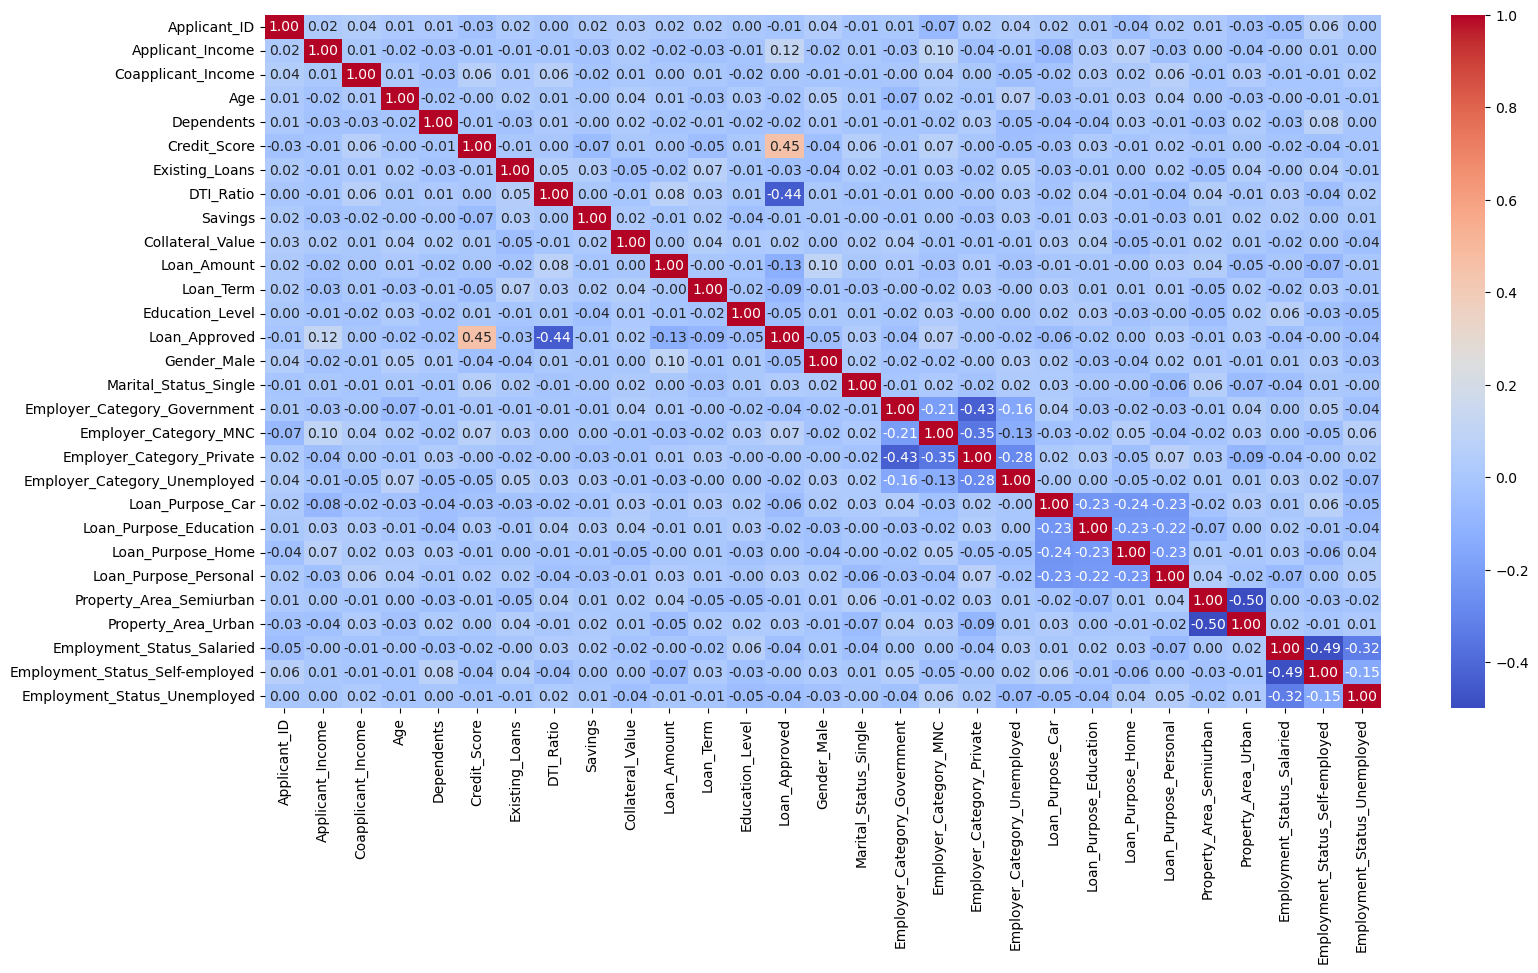

In [79]:
corr_matrix.corr()['Loan_Approved'].sort_values(ascending=False)    
plt.figure(figsize=(18,9))
sns.heatmap(corr_matrix, annot=True, fmt = '.2f', cmap='coolwarm')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import GridSearchCV
df['DTI_Ratio_squared'] = df['DTI_Ratio'] ** 2
df['Credit_Score_squared'] = df['Credit_Score']**2
df['Applicant_Income_log'] = np.log1p(df['Applicant_Income'])

X = df.drop(['Loan_Approved', 'DTI_Ratio', 'Credit_Score'], axis=1)
y = df['Loan_Approved']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,recall_score, precision_score, f1_score


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'solver': ['liblinear', 'lbfgs']
}


grid_log_reg = GridSearchCV(LogisticRegression(), param_grid, cv=5)

grid_log_reg.fit(X_train_scaled, y_train)

y_pred =  grid_log_reg.predict(X_test_scaled) 

print(grid_log_reg.best_params_)
print("the accuracy is ", accuracy_score(y_test, y_pred))
print("the recall is ", recall_score(y_test, y_pred))
print("the precision is ", precision_score(y_test, y_pred))
print("the f1 score is ", f1_score(y_test, y_pred))

{'C': 1, 'solver': 'liblinear'}
the accuracy is  0.88
the recall is  0.8360655737704918
the precision is  0.7846153846153846
the f1 score is  0.8095238095238095


In [87]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled, y_train)
y_pred_knn = KNN.predict(X_test_scaled)

print("the accuracy is ", accuracy_score(y_test, y_pred_knn))
print("the recall is ", recall_score(y_test, y_pred_knn))
print("the precision is ", precision_score(y_test, y_pred_knn))
print("the f1 score is ", f1_score(y_test, y_pred_knn))

the accuracy is  0.765
the recall is  0.45901639344262296
the precision is  0.6666666666666666
the f1 score is  0.5436893203883495


In [88]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train_scaled, y_train)
y_pred_nb = NB.predict(X_test_scaled)
print("the accuracy is ", accuracy_score(y_test, y_pred_nb))
print("the recall is ", recall_score(y_test, y_pred_nb))
print("the precision is ", precision_score(y_test, y_pred_nb))  
print("the f1 score is ", f1_score(y_test, y_pred_nb))

the accuracy is  0.855
the recall is  0.6885245901639344
the precision is  0.8076923076923077
the f1 score is  0.7433628318584071


In [89]:
import pickle

# 1. Save the Model
with open('best_loan_model.pkl', 'wb') as f:
    pickle.dump(grid_log_reg, f)

# 2. Save the Scaler (CRITICAL! You need this to translate new data later)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Model and Scaler saved successfully!")

Model and Scaler saved successfully!


In [90]:
# Save the column names so the app knows the correct order
model_columns = list(X.columns)
with open('model_columns.pkl', 'wb') as f:
    pickle.dump(model_columns, f)
print("Column names saved!")

Column names saved!
